#### Import modules and read data

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
MA_POP = 6892503  # from https://www.census.gov/quickfacts/MA

In [3]:
vax = pd.read_csv(os.getcwd() + '/Data/us_state_vaccinations.csv')

mass_vax = vax[vax['location'] == 'Massachusetts'].copy()
mass_vax['date'] = pd.to_datetime(mass_vax['date'])

mass_vax.shape

(136, 14)

In [4]:
mass_vax.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
3944,2021-01-12,Massachusetts,204082.0,476025.0,184984.0,0.28,2.96,19073.0,2.68,6.91,NaN,NaN,NaN,0.429
3945,2021-01-13,Massachusetts,217443.0,656850.0,192619.0,0.36,3.15,24789.0,2.79,9.53,13361.0,13361.0,1938.0,0.331
3946,2021-01-14,Massachusetts,233476.0,669225.0,204481.0,NaN,3.39,NaN,2.97,9.71,16033.0,14697.0,2132.0,0.349
3947,2021-01-15,Massachusetts,257175.0,669325.0,222109.0,0.51,3.73,34885.0,3.22,9.71,23699.0,17698.0,2568.0,0.384
3948,2021-01-16,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15425.5,17130.0,2485.0,NaN


In [5]:
xlsx = pd.read_excel(os.getcwd() + '/Data/covid-19-raw-data-5-27-2021.xlsx', sheet_name = ['Cases (Report Date)', 'CasesByDate (Test Date)', 'DateofDeath', 'Hospitalization from Hospitals', 'TestingByDate (Test Date)'], engine = 'openpyxl')

In [6]:
act_cases, cases, deaths, hosptl, tests = xlsx['Cases (Report Date)'][['Date', 'Estimated active cases']].dropna(), xlsx['CasesByDate (Test Date)'], xlsx['DateofDeath'], xlsx['Hospitalization from Hospitals'], xlsx['TestingByDate (Test Date)'].dropna(how = 'all').copy()
act_cases.shape, cases.shape, deaths.shape, hosptl.shape, tests.shape

((203, 2), (484, 4), (442, 6), (418, 9), (491, 25))

In [7]:
act_cases.head()

,Date,Estimated active cases
153,2020-11-02,16561.0
154,2020-11-03,16681.0
155,2020-11-04,17455.0
156,2020-11-05,18279.0
157,2020-11-06,19366.0


In [8]:
cases.head()

,Date,Positive Total,Positive New,7-day confirmed case average
0,2020-01-29,1,1,NaN
1,2020-01-30,1,0,NaN
2,2020-01-31,1,0,NaN
3,2020-02-01,1,0,NaN
4,2020-02-02,1,0,NaN


In [9]:
deaths.head()

,Date of Death,Confirmed Deaths,Confirmed Total,Probable Deaths,Probable Total,7-day confirmed death average
0,2020-03-10,0,0,0,0,NaN
1,2020-03-11,0,0,0,0,NaN
2,2020-03-12,0,0,0,0,NaN
3,2020-03-13,0,0,0,0,NaN
4,2020-03-14,0,0,0,0,NaN


In [10]:
hosptl.head()

,Date,Total number of COVID patients in hospital today,Net new number of COVID patients in hospital today,7 day average of COVID hospitalizations,ICU,Net New number ICU,Intubated,Net New number intubated,New COVID-19 hospitalizations
0,2020-04-04,1370,NaN,NaN,438,242,NaN,NaN,NaN
1,2020-04-05,1632,262.0,NaN,526,88,NaN,NaN,NaN
2,2020-04-06,1677,45.0,NaN,542,16,NaN,NaN,NaN
3,2020-04-07,1831,154.0,NaN,575,33,NaN,NaN,NaN
4,2020-04-08,2119,288.0,NaN,659,84,NaN,NaN,NaN


In [11]:
tests.head()

,Date,Molecular Total,Molecular New,Molecular Positive New,Antigen Positive New,Antigen New,Antigen Total,All Antigen Tests,All Positive Antigen Tests,First Molecular Test per person,...,All Molecular Tests_MA without Higher ED,All Positive Molecular Tests_MA without Higher ED,7-day weighted average positive test rate all molecular tests in MA,7-day weighted average positive test rate all molecular tests_Higher Ed ONLY,7-day weighted average positive test rate all molecular tests_MA without Higher ED,7-day average All Molecular Tests,7-day average daily molecular tests_MA without Higher ED,7-day average daily molecular tests_Higher ED ONLY,7-day average daily POSITIVE molecular tests_MA without Higher ED,7-day average daily POSITIVE molecular tests_Higher ED ONLY
0,2020-01-22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Total and active cases over time

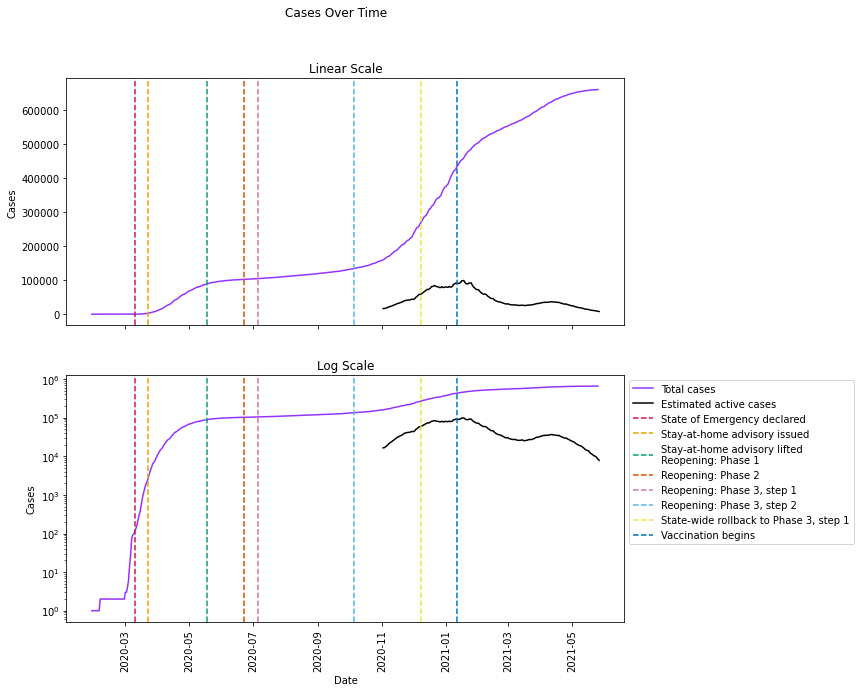

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (10, 10))
fig.suptitle('Cases Over Time')
# fig.subplots_adjust(hspace = 0.7)

ax1.plot(cases['Date'], cases['Positive Total'], color = '#9433ff', label = 'Total cases')
ax1.plot(act_cases['Date'], act_cases['Estimated active cases'], color = '#000000', label = 'Estimated active cases')
ax1.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#d41159', label = 'State of Emergency declared')
ax1.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#e69f00', label = 'Stay-at-home advisory issued')
ax1.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#009e73', label = 'Stay-at-home advisory lifted\nReopening: Phase 1')
ax1.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#d55300', label = 'Reopening: Phase 2')
ax1.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#cc79a7', label = 'Reopening: Phase 3, step 1')
ax1.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#56b4e9', label = 'Reopening: Phase 3, step 2')
ax1.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#f0e442', label = 'State-wide rollback to Phase 3, step 1')
ax1.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#0072b2', label = 'Vaccination begins')
ax1.set_title('Linear Scale')
# ax1.set_xlabel('Date')
ax1.set_ylabel('Cases')

ax2.plot(cases['Date'], cases['Positive Total'], color = '#9433ff', label = 'Total cases')
ax2.plot(act_cases['Date'], act_cases['Estimated active cases'], color = '#000000', label = 'Estimated active cases')
ax2.axvline(pd.to_datetime('2020-03-10'), ls = '--', color = '#d41159', label = 'State of Emergency declared')
ax2.axvline(pd.to_datetime('2020-03-23'), ls = '--', color = '#e69f00', label = 'Stay-at-home advisory issued')
ax2.axvline(pd.to_datetime('2020-05-18'), ls = '--', color = '#009e73', label = 'Stay-at-home advisory lifted\nReopening: Phase 1')
ax2.axvline(pd.to_datetime('2020-06-22'), ls = '--', color = '#d55300', label = 'Reopening: Phase 2')
ax2.axvline(pd.to_datetime('2020-07-06'), ls = '--', color = '#cc79a7', label = 'Reopening: Phase 3, step 1')
ax2.axvline(pd.to_datetime('2020-10-05'), ls = '--', color = '#56b4e9', label = 'Reopening: Phase 3, step 2')
ax2.axvline(pd.to_datetime('2020-12-08'), ls = '--', color = '#f0e442', label = 'State-wide rollback to Phase 3, step 1')
ax2.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#0072b2', label = 'Vaccination begins')
ax2.set_yscale('log')
ax2.set_title('Log Scale')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cases')

plt.xticks(rotation = 90)
plt.legend(loc = 2, bbox_to_anchor = (1, 1))
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/casesOverTime')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%23000000-%23E69F00-%2356B4E9-%23009E73-%23F0E442-%230072B2-%23D55E00-%23CC79A7-%239433ff-%23d41159

#### New positive cases

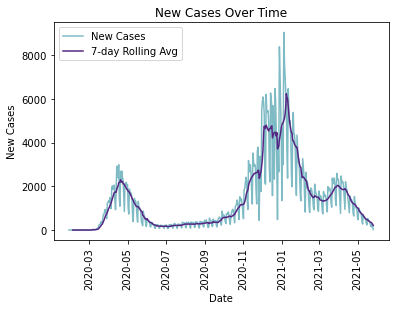

In [13]:
plt.plot(cases['Date'], cases['Positive New'], alpha = 0.5, color = '#00788c', label = 'New Cases')
plt.plot(cases['Date'], cases['Positive New'].rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/newPos')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%23552583-%2300788c

In [14]:
# plt.plot(cases['Date'].tail(60), cases['Positive New'].tail(60), alpha = 0.5, color = '#00788c', label = 'New Cases')
# plt.plot(cases['Date'].tail(60), cases['Positive New'].rolling(7).mean().tail(60), color = '#552583', label = '7-day Rolling Avg')
# plt.title('New Cases Over Time - Last 60 Days')
# plt.xlabel('Date')
# plt.ylabel('New Cases')
# plt.xticks(rotation = 90)
# plt.legend()
# plt.show()
# plt.close()

In [15]:
# # plt.plot(cases['Date'].tail(60), (cases['Positive New'].pct_change() * 100).tail(60), alpha = 0.5, color = '#00788c', label = 'Pct. Change')
# plt.plot(cases['Date'].tail(60), (cases['Positive New'].pct_change() * 100).rolling(7).mean().tail(60), color = '#552583', label = '7-day Rolling Avg')
# plt.title('New Cases Over Time - Percent Change in the Last 60 Days')
# plt.xlabel('Date')
# plt.ylabel('Percent Change')
# plt.xticks(rotation = 90)
# # plt.legend()
# plt.show()
# plt.close()

#### Case rates and testing

In [16]:
higher_ed_tests = tests[['Date', 'All Positive Molecular Tests_Higher Ed ONLY', 'All Molecular Tests_Higher Ed ONLY']].dropna()

higher_ed_tests.head()

,Date,All Positive Molecular Tests_Higher Ed ONLY,All Molecular Tests_Higher Ed ONLY
206,2020-08-15,3.0,1615.0
207,2020-08-16,7.0,1923.0
208,2020-08-17,11.0,11713.0
209,2020-08-18,4.0,12295.0
210,2020-08-19,11.0,12400.0


In [17]:
ex_higher_ed_tests = tests[['Date', 'All Positive Molecular Tests_MA without Higher ED', 'All Molecular Tests_MA without Higher ED']].dropna()

ex_higher_ed_tests.head()

,Date,All Positive Molecular Tests_MA without Higher ED,All Molecular Tests_MA without Higher ED
206,2020-08-15,183.0,12867.0
207,2020-08-16,136.0,9679.0
208,2020-08-17,464.0,28991.0
209,2020-08-18,452.0,27270.0
210,2020-08-19,396.0,26224.0


Positive test rate over time

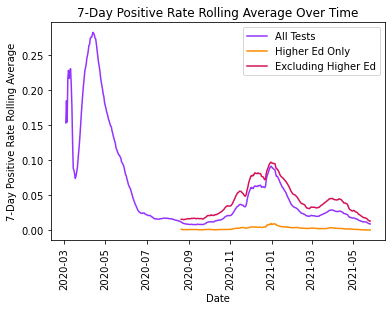

In [18]:
# plt.plot(tests['Date'], tests['All Positive Molecular Tests'] / tests['All Molecular Tests'], alpha = 0.5, color = '#00788c')
plt.plot(tests['Date'], (tests['All Positive Molecular Tests'] / tests['All Molecular Tests']).rolling(7).mean(), color = '#9433ff', label ='All Tests')
plt.plot(higher_ed_tests['Date'], (higher_ed_tests['All Positive Molecular Tests_Higher Ed ONLY'] / higher_ed_tests['All Molecular Tests_Higher Ed ONLY']).rolling(7).mean(), color = '#ff8b00', label = 'Higher Ed Only')
plt.plot(higher_ed_tests['Date'], (ex_higher_ed_tests['All Positive Molecular Tests_MA without Higher ED'] / ex_higher_ed_tests['All Molecular Tests_MA without Higher ED']).rolling(7).mean(), color = '#d41159', label = 'Excluding Higher Ed')
plt.title('7-Day Positive Rate Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('7-Day Positive Rate Rolling Average')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/posRate')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%239433ff-%23ff8b00-%23D41159

Daily tests over time

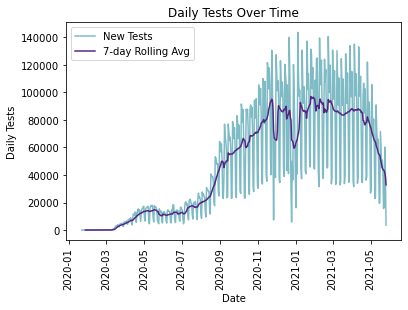

In [19]:
plt.plot(tests['Date'], tests['All Molecular Tests'], alpha = 0.5, color = '#00788c', label = 'New Tests')
plt.plot(tests['Date'], (tests['All Molecular Tests']).rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('Daily Tests Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Tests')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/dailyTests')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%23552583-%2300788c

Lag in testing over the weekend

In [20]:
tests['Day'] = tests['Date'].dt.day_name()

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tests_by_dow = tests.groupby('Day').agg({'All Positive Molecular Tests': 'sum', 'All Molecular Tests': 'sum'}).reindex(dow_order)

tests_by_dow

,All Positive Molecular Tests,All Molecular Tests
Day,,
Monday,146922.0,4624120.0
Tuesday,138711.0,4272682.0
Wednesday,131701.0,3704310.0
Thursday,119234.0,3896435.0
Friday,113681.0,3273595.0
Saturday,79098.0,1602187.0
Sunday,55351.0,1450248.0


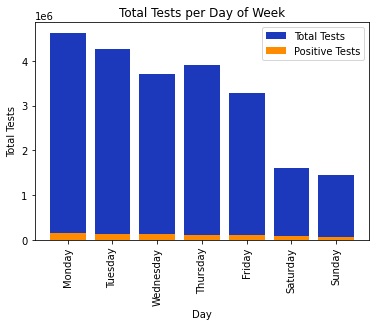

In [21]:
plt.bar(tests_by_dow.index, tests_by_dow['All Molecular Tests'], color = '#1c39bb', label = 'Total Tests')
plt.bar(tests_by_dow.index, tests_by_dow['All Positive Molecular Tests'], color = '#ff8b00', label = 'Positive Tests')
plt.title('Total Tests per Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Tests')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/testsPerDay')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%231c39bb-%23ff8b00

#### Deaths

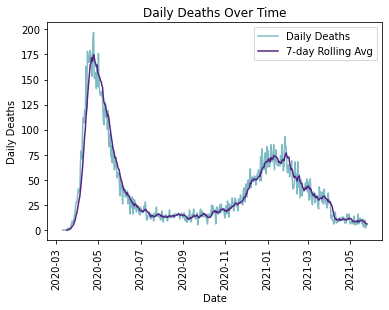

In [22]:
plt.plot(deaths['Date of Death'], deaths['Confirmed Deaths'],alpha = 0.5, color = '#00788c', label = 'Daily Deaths')
plt.plot(deaths['Date of Death'], deaths['Confirmed Deaths'].rolling(7).mean(), color = '#552583', label = '7-day Rolling Avg')
plt.title('Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/dailyDeaths')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%23552583-%2300788c

#### Hospitalisations

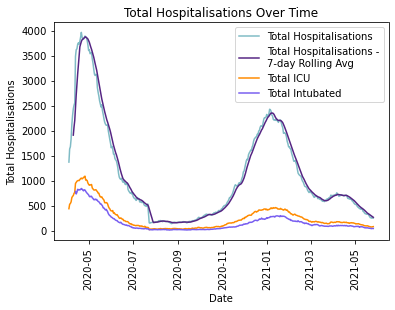

In [23]:
plt.plot(hosptl['Date'], hosptl['Total number of COVID patients in hospital today'], alpha = 0.5, color = '#00788c', label = 'Total Hospitalisations')
plt.plot(hosptl['Date'], hosptl['Total number of COVID patients in hospital today'].rolling(7).mean(), color = '#552583', label = 'Total Hospitalisations -\n7-day Rolling Avg')
plt.plot(hosptl['Date'], hosptl['ICU'], color = '#ff8b00', label = 'Total ICU')
plt.plot(hosptl['Date'], hosptl['Intubated'], color = '#785ef0', label = 'Total Intubated')
plt.title('Total Hospitalisations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Hospitalisations')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/totalHosp')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%2300788c-%23552583-%23ff8b00-%23785ef0

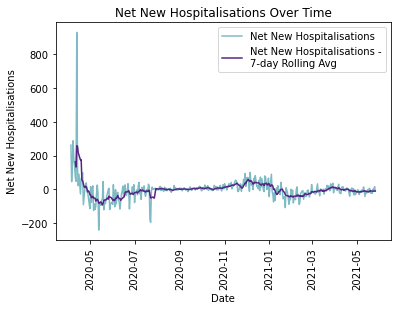

In [24]:
plt.plot(hosptl['Date'], hosptl['Net new number of COVID patients in hospital today'], alpha = 0.5, color = '#00788c', label = 'Net New Hospitalisations')
plt.plot(hosptl['Date'], hosptl['Net new number of COVID patients in hospital today'].rolling(7).mean(), color = '#552583', label = 'Net New Hospitalisations -\n7-day Rolling Avg')
# plt.plot(hosptl['Date'], hosptl['Net New number ICU'], color = '#ff8b00', label = 'Total ICU')
plt.title('Net New Hospitalisations Over Time')
plt.xlabel('Date')
plt.ylabel('Net New Hospitalisations')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/netNewHosp')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%23552583-%2300788c

#### Vaccinations

Number of doses administered

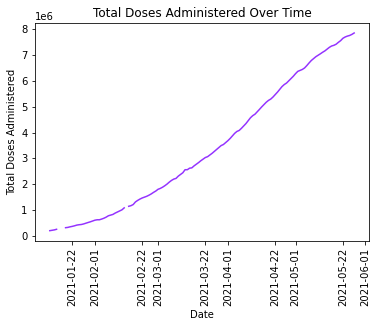

In [25]:
plt.plot(mass_vax['date'], mass_vax['total_vaccinations'], color = '#9433ff')
# plt.yscale('log')
plt.title('Total Doses Administered Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation = 90)
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/totalDoses')
plt.show()
plt.close()

People fully vaccinated vs total cases over time

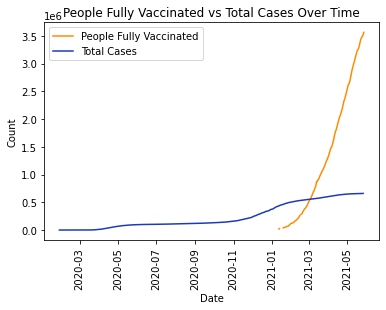

In [26]:
plt.plot(mass_vax['date'], mass_vax['people_fully_vaccinated'], color = '#ff8b00', label = 'People Fully Vaccinated')
plt.plot(cases['Date'], cases['Positive Total'], color = '#1c39bb', label = 'Total Cases')
plt.title('People Fully Vaccinated vs Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/vaxVsCases')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%231c39bb-%23ff8b00

New doses administered - 7-day smoothed

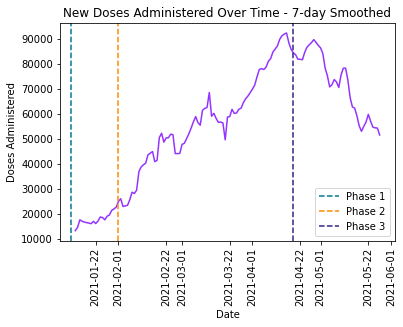

In [27]:
plt.plot(mass_vax['date'], mass_vax['daily_vaccinations'], color = '#9433ff')
plt.axvline(pd.to_datetime('2021-01-11'), ls = '--', color = '#00788c', label = 'Phase 1')
plt.axvline(pd.to_datetime('2021-02-01'), ls = '--', color = '#ff8b00', label = 'Phase 2')
plt.axvline(pd.to_datetime('2021-04-19'), ls = '--', color = '#332288', label = 'Phase 3')
plt.title('New Doses Administered Over Time - 7-day Smoothed')
plt.xlabel('Date')
plt.ylabel('Doses Administered')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/newDoses')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%239433ff-%2300788c-%23332288-%23ff8b00

People fully vaccinated vs at least one dose over time

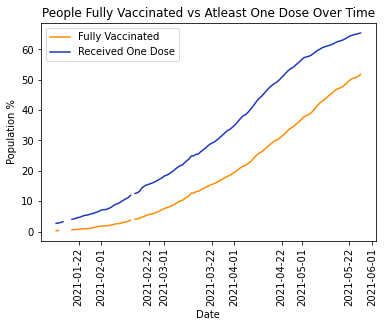

In [28]:
plt.plot(mass_vax['date'], (mass_vax['people_fully_vaccinated'] / MA_POP) * 100, color = '#ff8b00', label = 'Fully Vaccinated')
plt.plot(mass_vax['date'], (mass_vax['people_vaccinated'] / MA_POP) * 100, color = '#1c39bb', label = 'Received One Dose')
plt.title('People Fully Vaccinated vs Atleast One Dose Over Time')
plt.xlabel('Date')
plt.ylabel('Population %')
plt.xticks(rotation = 90)
plt.legend()
# plt.tight_layout()
# plt.savefig(os.getcwd() + '/Graphs/firstSecondDose')
plt.show()
plt.close()

https://davidmathlogic.com/colorblind/#%231c39bb-%23ff8b00